# Problem Statement : To predict house price of unit area by applying multiple linear regression

## 1. Import Libraries

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error , mean_absolute_error , r2_score

## 2.Data Collection

In [265]:
df = pd.read_csv('E:/ML_Datasets/Real estate - Copy.csv')

In [266]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### 3. Data Preprocessing

### shape

In [267]:
df.shape

(414, 8)

### check higher price of house per unit

In [268]:
df.sort_values(['Y house price of unit area'] , ascending = False)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0
166,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
...,...,...,...,...,...,...,...,...
226,227,2013.000,16.5,4082.0150,0,24.94155,121.50381,12.8
116,117,2013.000,30.9,6396.2830,1,24.94375,121.47883,12.2
162,163,2012.750,16.0,4066.5870,0,24.94297,121.50342,11.6
347,348,2013.583,17.4,6488.0210,1,24.95719,121.47353,11.2


### OR

In [269]:
df.nlargest(414 , 'Y house price of unit area' )

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0
166,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
...,...,...,...,...,...,...,...,...
226,227,2013.000,16.5,4082.0150,0,24.94155,121.50381,12.8
116,117,2013.000,30.9,6396.2830,1,24.94375,121.47883,12.2
162,163,2012.750,16.0,4066.5870,0,24.94297,121.50342,11.6
347,348,2013.583,17.4,6488.0210,1,24.95719,121.47353,11.2


### Check missing values from whole dataset

In [270]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Check description of dataset

In [271]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### paiplot : pairplot shows relation in pairwise

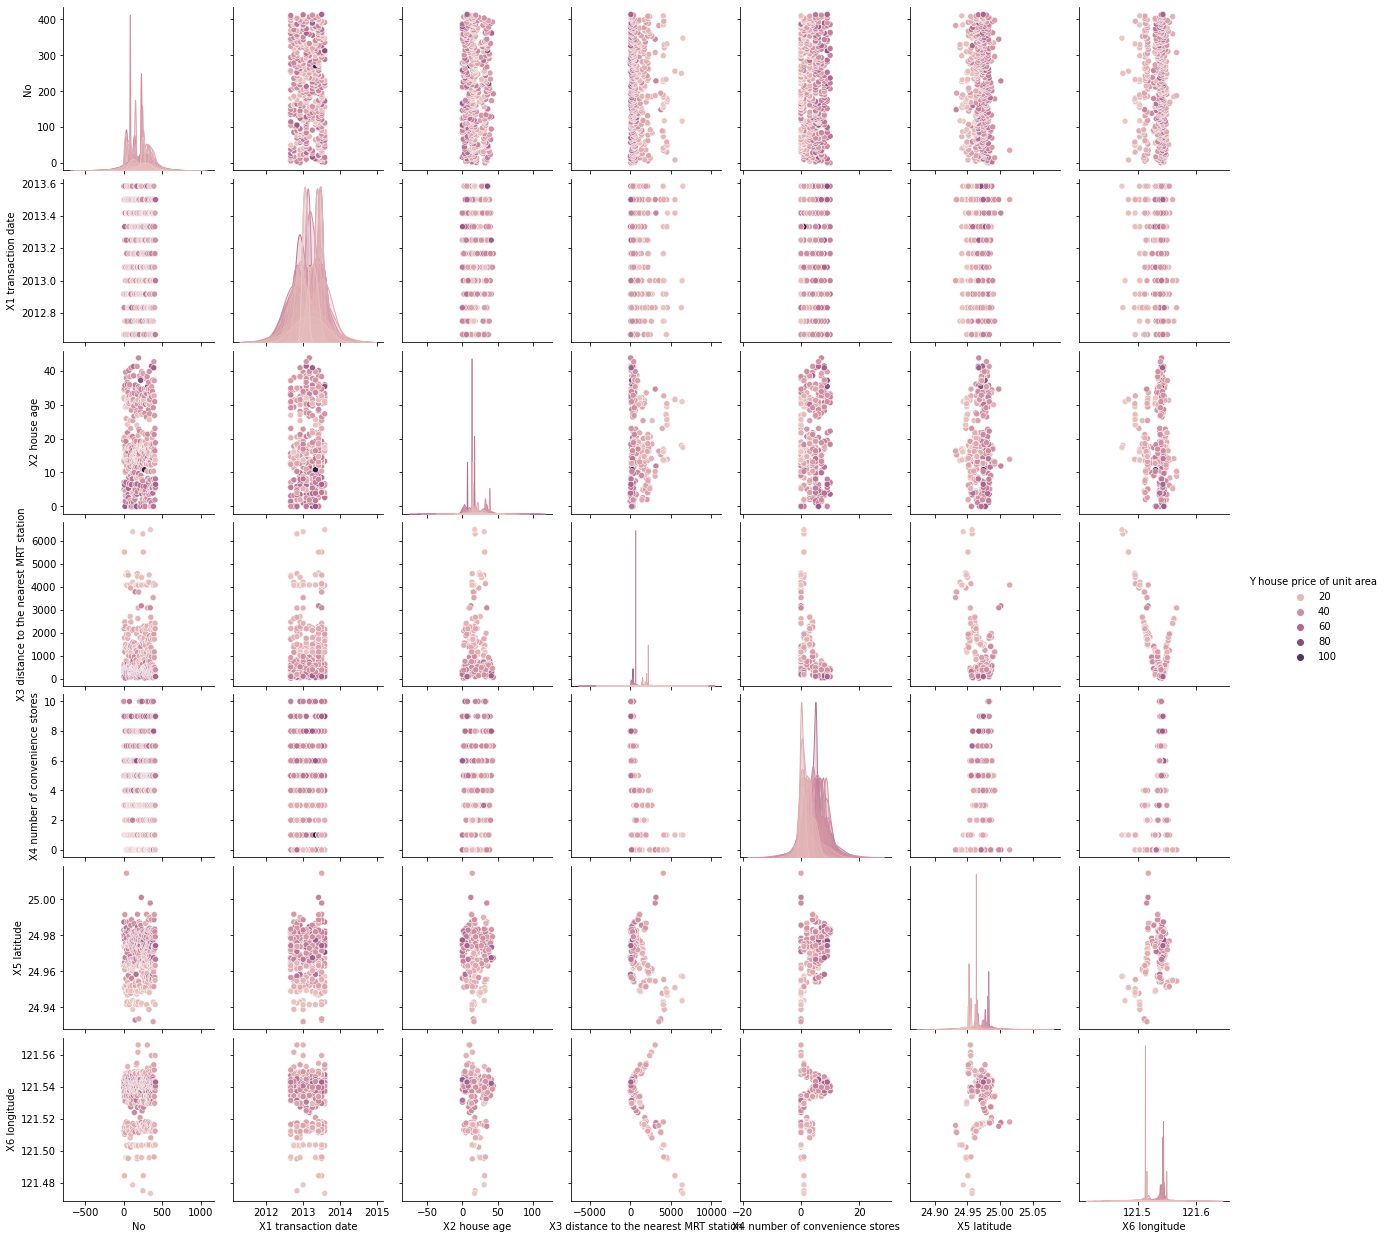

In [272]:
sns.pairplot(df , hue = 'Y house price of unit area')

### Histogram : To show distribution of dataset 

array([[<AxesSubplot:title={'center':'No'}>,
        <AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>],
       [<AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>,
        <AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>],
       [<AxesSubplot:title={'center':'X6 longitude'}>,
        <AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x432 with 0 Axes>

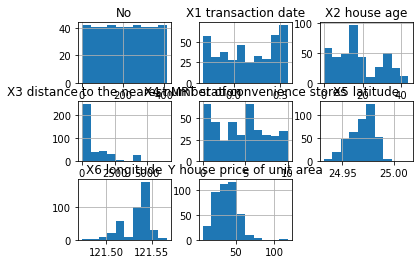

In [273]:
plt.figure(figsize = (20 , 6))
df.hist()

###  Featurewise Histogram 

<AxesSubplot:xlabel='X1 transaction date', ylabel='Count'>

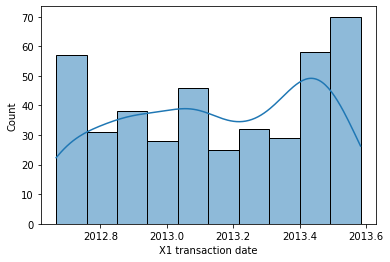

In [274]:
sns.histplot(df['X1 transaction date'] , kde = True)

<AxesSubplot:xlabel='X2 house age', ylabel='Count'>

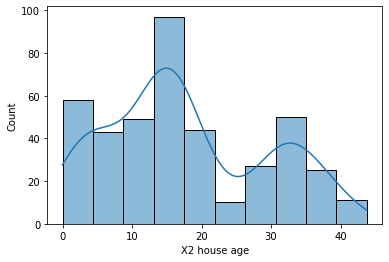

In [275]:
sns.histplot(df['X2 house age'] , kde = True)

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Count'>

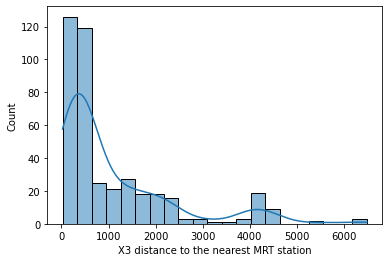

In [276]:
sns.histplot(df['X3 distance to the nearest MRT station'] , kde = True)
#sns.histplot(df['X3 distance to the nearest MRT station'] , kde = True)

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Count'>

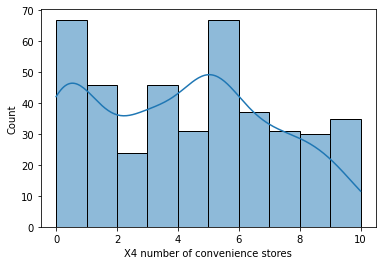

In [277]:
sns.histplot(df['X4 number of convenience stores' ], kde = True)

<AxesSubplot:xlabel='X5 latitude', ylabel='Count'>

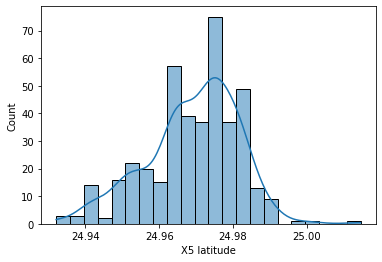

In [278]:
sns.histplot(df['X5 latitude'] , kde = True)

<AxesSubplot:xlabel='X6 longitude', ylabel='Count'>

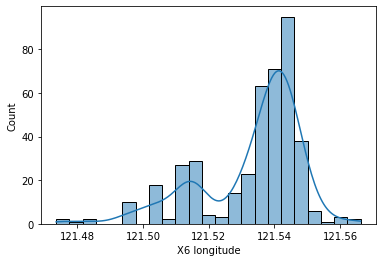

In [279]:
sns.histplot(df['X6 longitude'], kde = True)

<AxesSubplot:xlabel='Y house price of unit area', ylabel='Count'>

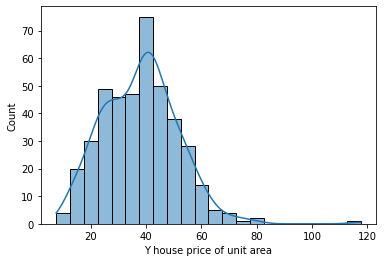

In [280]:
sns.histplot(df['Y house price of unit area'] , kde = True)

## check outliers from dataset

<AxesSubplot:>

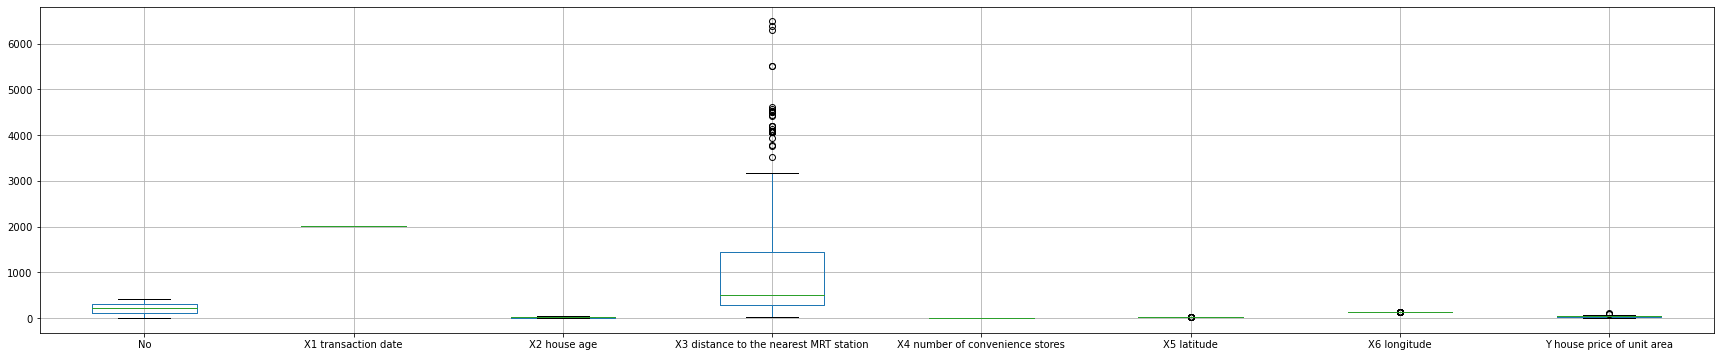

In [281]:
plt.figure(figsize = (30 , 6))
df.boxplot()

### How to treate with outliers

#### 1. Visualise

##### By Boxplot

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X3 distance to the nearest MRT station'>

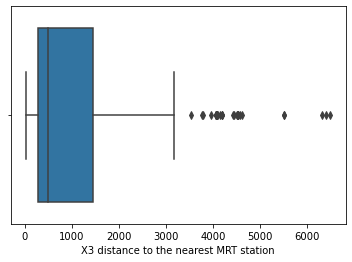

In [282]:
sns.boxplot(df['X3 distance to the nearest MRT station'])

##### Histogram

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Count'>

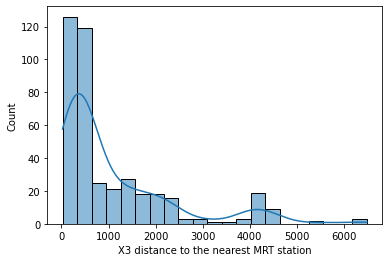

In [283]:
sns.histplot(df['X3 distance to the nearest MRT station'] , kde = True)

#### 2.checking skewness of X3 distance to the nearest MRT station feature

##### skewness is between range of -1 to 1 . if skewness is -1 then it is leftly skew . if skewness is 1 then it is rightly skew . if skewness is between and o and 1 then it is normal skewed.

In [284]:
print('skewness of X3 distance to the nearest MRT station feature is :' , df['X3 distance to the nearest MRT station'].skew())

skewness of X3 distance to the nearest MRT station feature is : 1.8887565801256048


#### 3. IQR : InterQuartile range

In [285]:
Q1 = np.percentile(df['X3 distance to the nearest MRT station'] , 25 , interpolation = 'midpoint')
Q2 = np.percentile(df['X3 distance to the nearest MRT station'] , 50 , interpolation = 'midpoint')
Q3 = np.percentile(df['X3 distance to the nearest MRT station'] , 75 , interpolation = 'midpoint')

print('Q1 is :' , Q1)
print('Q2 is :' , Q2)
print('Q3 is :' , Q3)


IQR = Q3 - Q1

print('IQR is :' , IQR)

whisker_width = 1.5

low_lim = (Q1) - (whisker_width * IQR)
high_lim = (Q3) + (whisker_width * IQR)


print('low limit is :' , low_lim)
print('High limit is :' , high_lim)

index = df['X3 distance to the nearest MRT station'][(df['X3 distance to the nearest MRT station'] > high_lim) | (df['X3 distance to the nearest MRT station'] < low_lim)].index

print(index)

print('Dataset shape before the remove outliers:' , df.shape)

df.drop(labels = index , axis = 0 , inplace = True)

print('Dataset shape after the remove outliers:' , df.shape)


Q1 is : 289.3248
Q2 is : 492.2313
Q3 is : 1452.76
IQR is : 1163.4352
low limit is : -1455.828
High limit is : 3197.9128
Int64Index([  8,  30,  35,  40,  41,  48,  49,  58,  73,  87,  89, 116, 117,
            148, 154, 155, 162, 170, 176, 180, 183, 189, 194, 226, 231, 232,
            249, 255, 298, 320, 329, 331, 347, 382, 384, 394, 409],
           dtype='int64')
Dataset shape before the remove outliers: (414, 8)
Dataset shape after the remove outliers: (377, 8)


#### Boxplot after removing outliers

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X3 distance to the nearest MRT station'>

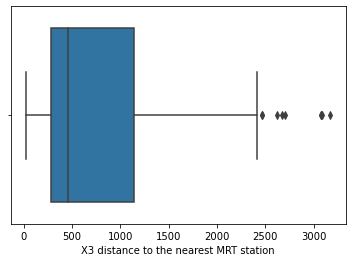

In [286]:
sns.boxplot(df['X3 distance to the nearest MRT station'])

### Feature Selection 

#### Mutual info regression method used for feature selection because our input data is in numerical format and output is in numerical format

In [287]:
from sklearn.feature_selection import mutual_info_regression

In [288]:
model_f = mutual_info_regression(x , y)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [289]:
model_f

array([0.        , 0.31258734, 0.55271619, 0.32797816, 0.42200364,
       0.51894183])

In [290]:
Feature = pd.DataFrame(x.columns , columns = ['Feature'])
Score = pd.DataFrame(model_f , columns = ['Score'])

In [291]:
model_f_score  = pd.concat([Feature , Score] , axis = 1  ) 

In [292]:
model_f_score

,Feature,Score
0,X1 transaction date,0.000000
1,X2 house age,0.312587
2,X3 distance to the nearest MRT station,0.552716
3,X4 number of convenience stores,0.327978
4,X5 latitude,0.422004
5,X6 longitude,0.518942


In [293]:
model_f_score_nlarge = model_f_score.nlargest(7 , 'Score')

In [294]:
model_f_score_nlarge

,Feature,Score
2,X3 distance to the nearest MRT station,0.552716
5,X6 longitude,0.518942
4,X5 latitude,0.422004
3,X4 number of convenience stores,0.327978
1,X2 house age,0.312587
0,X1 transaction date,0.000000


#### Faeture Importance Plot

<BarContainer object of 6 artists>

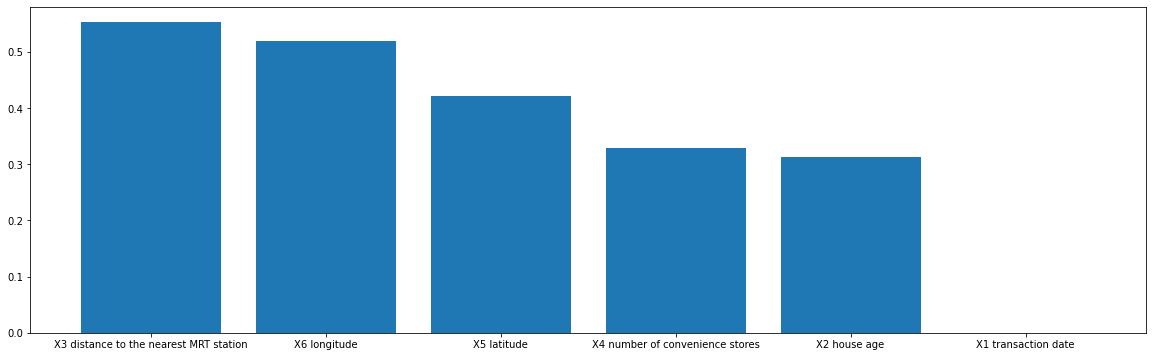

In [295]:
plt.figure(figsize = (20 , 6))
plt.bar(model_f_score_nlarge['Feature'] , model_f_score_nlarge['Score'])

#### Data split into Features and Target variable

In [296]:
x = df.iloc[:,1:-1]
y = pd.DataFrame(df.iloc[: , -1])

#### Feature Variable

In [297]:
x.head(1)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024


#### Target Variable

In [298]:
y.head(1)

,Y house price of unit area
0,37.9


#### Data split into train and test

In [299]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 42)

### Data Preprocessing Complete

### EDA : Exploratory Data Analyasis

#### Import mutliple linear regression model

In [300]:
from sklearn.linear_model import LinearRegression

In [301]:
model = LinearRegression()

#### Fit training data

In [302]:
model.fit(x_train , y_train)

LinearRegression()

#### Training Accuracy

In [303]:
model.score(x_train , y_train)

0.5452686942984941

#### Testing Accuracy

In [304]:
model.score(x_test , y_test)

0.6167309892342326

#### Model get underfitted due to high bias and high variance

#### Prediction output

In [305]:
y_pred = model.predict(x_test)

In [306]:
y_pred

array([[32.00062595],
       [52.59136989],
       [32.35662866],
       [42.38033498],
       [49.16345849],
       [35.15474796],
       [40.09759026],
       [20.85572568],
       [41.21120214],
       [34.29499433],
       [41.23398478],
       [21.63790244],
       [24.37128312],
       [42.70392423],
       [25.75380922],
       [19.82824299],
       [36.63426315],
       [34.12139189],
       [25.53945399],
       [43.87106601],
       [52.7791766 ],
       [41.8424599 ],
       [39.79652422],
       [47.89793366],
       [49.64421817],
       [44.10016432],
       [48.10672813],
       [27.37653168],
       [35.15891196],
       [44.39238891],
       [49.7815969 ],
       [23.51306535],
       [43.88298286],
       [37.51836331],
       [35.56467575],
       [49.13316019],
       [41.77858718],
       [51.37328772],
       [39.43838568],
       [46.24313459],
       [32.9446838 ],
       [49.17307427],
       [47.75106533],
       [47.13999486],
       [37.60264287],
       [28

### Performance Matrix or Evaluation Matrix or Cost Function

#### Mean Squared Error

In [307]:
mse = mean_squared_error(y_test , y_pred)

In [308]:
mse 

54.68276477392258

#### Root Mean Squared Error

In [309]:
rmse = np.sqrt(mse)

In [310]:
rmse

7.394779562226488

#### Mean Absolute Error

In [311]:
mae = mean_absolute_error(y_test , y_pred)

In [312]:
mae

5.329530532805381

#### R2 Score

In [313]:
r2_score = r2_score(y_test , y_pred)

In [314]:
r2_score

0.6167309892342326